**기초 프로젝트** __
18조 멍멍냥냥 이민준

# Golden State Warriors – 구단주 관점 분석

## 분석 목표
Golden State Warriors의 **구단 자산 가치, 투자 효율성, 브랜드 영향력, 수익 구조, 장기 성과 관리**를
데이터 기반으로 분석한다.

## 핵심 분석 영역 (2가지)
1. 팀 가치 및 영향력 평가  
   **시즌별 팀 승률 추세 분석 (2003–2022)**  
   → 장기 성장 흐름과 성과의 일관성 평가

2. 홈 구장 기반 경쟁력 및 수익성 평가  
   **홈 어드밴티지 및 승리 요인 분석**  
   → 홈·원정 성적 격차와 주요 경기력 요인 비교

< 구단주 >

질문 : “어디에 투자해야 이 팀의 가치가 커지는가?”

분석 초점 : 장기 승률·랭킹 추세 & 홈 구장 경쟁력 &구조적 변화 여부

결과물 : 투자 방향 결정 & 자산 유지/교체 판단


**======================================================**

# 필요한 라이브러리 불러오기 및 환경 설정



In [46]:
# Golden State Warriors 데이터 분석 - 환경 설정

# 데이터 처리 및 수치 연산
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 제거
import warnings
warnings.filterwarnings('ignore')

# Warriors 브랜드 컬러
GSW_BLUE = '#1D428A'
GSW_YELLOW = '#FFC72C'
GSW_GRAY = '#26282A'

# 시각화 기본 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("Golden State Warriors - 구단주 관점 분석")

Golden State Warriors - 구단주 관점 분석


# 데이터 로드

## 필요한 CSV 파일:
* games.csv
* teams.csv
* ranking.csv

In [47]:
# CSV 파일 읽기
games = pd.read_csv('games.csv')
teams = pd.read_csv('teams.csv')
ranking = pd.read_csv('ranking.csv')

# 데이터 크기 확인
print(f"✓ games: {games.shape[0]:,}행 x {games.shape[1]}열")
print(f"✓ teams: {teams.shape[0]:,}행 x {teams.shape[1]}열")
print(f"✓ ranking: {ranking.shape[0]:,}행 x {ranking.shape[1]}열")

✓ games: 26,651행 x 21열
✓ teams: 30행 x 14열
✓ ranking: 210,342행 x 13열


## 데이터 전처리



## 필요로 하는 CSV 파일의 컬럼들

---

### 1️. teams.csv  
Golden State Warriors의 TEAM_ID 식별 및 구단 기본 정보 확인

**사용 컬럼**
- TEAM_ID  -팀 고유 식별 번호
- NICKNAME  -팀 애칭
- CITY  -연고 도시
- ARENA  -홈 경기장 이름
- YEARFOUNDED  -창단 연도

**전처리**
- `NICKNAME == 'Warriors'` 조건으로 Warriors 행을 필터링함  
- 추출한 `TEAM_ID`를 이후 모든 데이터 분석의 기준 키로 사용함  

---

### 2️. games.csv  
Warriors 경기 데이터 추출 / 홈·원정 구분 / 승패 판정 /  
홈 어드밴티지 및 팀 스탯 분석

**사용 컬럼**
- GAME_ID  -경기 고유 ID
- GAME_DATE_EST  -경기 날짜
- HOME_TEAM_ID  -홈팀 ID
- VISITOR_TEAM_ID  -원정팀 ID
- PTS_home, PTS_away  -홈팀 득점, 원정팀 득점
- AST_home, AST_away  -홈/원정 팀 어시스트 수
- REB_home, REB_away  -홈/원정 팀 리바운드 수
- FG_PCT_home, FG_PCT_away  -홈/원정  팀필드골 성공률
- FG3_PCT_home, FG3_PCT_away  -홈/원정  팀3점슛 성공률
- FT_PCT_home, FT_PCT_away  -홈/원정  팀자유투 성공률

**생성한 파생변수**
- `IS_HOME`  -홈 경기 여부
  - 해당 경기가 Warriors의 홈 경기인지 여부 (True / False)  
- `GSW_WIN`  -Warriors 승리 여부
  - 홈/원정 여부를 고려한 Warriors의 승패 결과  
- `GSW_AST`, `GSW_REB`, `GSW_FG_PCT`, `GSW_FG3_PCT`, `GSW_FT_PCT`  -Warriors 어시스트, Warriors 리바운드, Warriors 필드골 성공률, Warriors 3점 성공률, Warriors 자유투 성공률
  - 홈/원정 기준으로 나뉜 컬럼을 Warriors 기준 팀 스탯으로 재구성  

**전처리**
- 날짜 컬럼(`GAME_DATE_EST`)을 `datetime` 형식으로 변환함  
- 홈/원정 기준 데이터를 Warriors 기준 구조로 재정렬함  

---

### 3️. ranking.csv  
시즌 단위 성과 집계 / 장기 승률 추이 분석 / 컨퍼런스 내 순위 계산

**사용 컬럼**
- TEAM_ID  -팀 ID
- SEASON_ID  -시즌 코드
- STANDINGSDATE  -순위 기준 날짜
- W, L  -시즌 누적 승리 수, 시즌 누적 패배 수
- W_PCT  -승률
- CONFERENCE  -소속 컨퍼런스(west/east)

**생성한 파생변수**
- `SEASON_LABEL`  -시즌 표기
  - 내부 시즌 코드(SEASON_ID)를 사람이 읽기 쉬운 형식으로 변환  
  - 예: `2015-16`  
- `CONF_RANK`  -컨퍼런스 내 순위
  - 시즌별 서부 컨퍼런스 내 승률 기준 순위  

**전처리**
- `STANDINGSDATE`를 `datetime` 형식으로 변환함  
- `W_PCT`를 numeric 타입으로 변환함  
- 분석 대상 시즌을 2003–04 ~ 2022–23 시즌으로 제한함  
- 시즌 단위(`SEASON_ID`)로 groupby하여 승/패 합계 및 평균 승률을 계산함  


**전처리 단계:**
1. Warriors TEAM_ID 식별
2. 날짜 형식 변환
3. 홈/원정 경기 분리
4. Warriors 통계 계산
5. 날짜 -> 시즌 변환

In [48]:
# 탐색적 데이터 분석 (EDA)

print("\n" + "="*80)
print("1. games 데이터 구조 확인")
print("="*80)

# 데이터 정보 출력
print("\n[데이터 정보]")
print(games.info())

# 상위 5개 행 확인
print("\n[데이터 샘플]")
print(games.head())

# 데이터 통계량
print("\n[데이터 통계량]")
print(games.describe())

print("\n" + "="*80)
print("2. teams 데이터 구조 확인")
print("="*80)

print("\n[데이터 정보]")
print(teams.info())

print("\n[데이터 샘플]")
print(teams.head())

# Warriors 팀 존재 여부 확인
print("\n[Warriors 팀 확인]")
print(teams[teams['NICKNAME'] == 'Warriors'])

print("\n" + "="*80)
print("3. ranking 데이터 구조 확인")
print("="*80)

print("\n[데이터 정보]")
print(ranking.info())

print("\n[데이터 샘플]")
print(ranking.head())

print("\n[데이터 통계량]")
print(ranking.describe())

print("\n" + "="*80)
print("4. 결측치 확인")
print("="*80)

print("\n• games 결측치:")
missing_games = games.isnull().sum()
if missing_games[missing_games > 0].empty:
    print("  결측치 없음")
else:
    print(missing_games[missing_games > 0])

print("\n• teams 결측치:")
missing_teams = teams.isnull().sum()
if missing_teams[missing_teams > 0].empty:
    print("  결측치 없음")
else:
    print(missing_teams[missing_teams > 0])

print("\n• ranking 결측치:")
missing_ranking = ranking.isnull().sum()
if missing_ranking[missing_ranking > 0].empty:
    print("  결측치 없음")
else:
    print(missing_ranking[missing_ranking > 0])


1. games 데이터 구조 확인

[데이터 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_awa

In [49]:
# 데이터 전처리 1: Warriors 데이터 추출 및 경기력 지표 생성

# Warriors 팀 ID 추출
gsw_info = teams[teams['NICKNAME'] == 'Warriors']
GSW_TEAM_ID = gsw_info['TEAM_ID'].values[0]

# Warriors 팀 정보 출력
print(f"\nGolden State Warriors")
print(f"  팀 ID: {GSW_TEAM_ID}")
print(f"  도시: {gsw_info['CITY'].values[0]}")
print(f"  홈 구장: {gsw_info['ARENA'].values[0]}")
print(f"  창단 연도: {gsw_info['YEARFOUNDED'].values[0]}")

# 날짜 컬럼을 datetime 형식으로 변환
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])
ranking['STANDINGSDATE'] = pd.to_datetime(ranking['STANDINGSDATE'])
ranking['W_PCT'] = pd.to_numeric(ranking['W_PCT'], errors='coerce')

# Warriors 경기 데이터 필터링 (홈 또는 원정)
gsw_games = games[
    (games['HOME_TEAM_ID'] == GSW_TEAM_ID) |
    (games['VISITOR_TEAM_ID'] == GSW_TEAM_ID)
].copy()

# 홈/원정 구분 및 승패 판정
gsw_games['IS_HOME'] = gsw_games['HOME_TEAM_ID'] == GSW_TEAM_ID
gsw_games['GSW_WIN'] = np.where(
    gsw_games['IS_HOME'],
    gsw_games['PTS_home'] > gsw_games['PTS_away'],
    gsw_games['PTS_away'] > gsw_games['PTS_home']
)

# Warriors 경기력 지표 통합 (홈/원정 구분 없이 Warriors 기준으로)
for stat in ['AST', 'REB', 'FG_PCT', 'FG3_PCT', 'FT_PCT']:
    gsw_games[f'GSW_{stat}'] = np.where(
        gsw_games['IS_HOME'],
        gsw_games[f'{stat}_home'],
        gsw_games[f'{stat}_away']
    )

# Warriors 랭킹 데이터 필터링
gsw_ranking = ranking[ranking['TEAM_ID'] == GSW_TEAM_ID].copy()

# 시즌 ID를 사람이 읽기 쉬운 형식으로 변환하는 함수
def season_to_label(season_id):
    """SEASON_ID를 시즌 표기로 변환 (예: 22014 → 2014-15)"""
    year_start = int(str(season_id)[1:])
    year_end = year_start + 1
    return f"{year_start}-{str(year_end)[2:]}"

# Warriors 경기 데이터 확인
print("\n[Warriors 경기 데이터 샘플]")
print(gsw_games.head())
print(f"\n데이터 크기: {gsw_games.shape}")

# 생성된 컬럼 확인
print("\n[생성된 Warriors 전용 컬럼 확인]")
print(gsw_games[['IS_HOME', 'GSW_WIN', 'GSW_AST', 'GSW_REB', 'GSW_FG_PCT']].head())

# 홈/원정 분포 확인
print("\n[홈/원정 경기 분포]")
print(f"홈 경기: {gsw_games['IS_HOME'].sum()}경기")
print(f"원정 경기: {(~gsw_games['IS_HOME']).sum()}경기")

# 승패 분포 확인
print("\n[Warriors 전체 성적]")
wins = gsw_games['GSW_WIN'].sum()
losses = len(gsw_games) - wins
total_winrate = gsw_games['GSW_WIN'].mean()
print(f"승리: {wins}경기")
print(f"패배: {losses}경기")
print(f"전체 승률: {total_winrate:.3f}")

# Warriors 랭킹 데이터 확인
print("\n[Warriors 랭킹 데이터 샘플]")
print(gsw_ranking.head())

# 결과 요약
print("\n시즌 형식: 22014 = 2014-15 시즌")
print(f"\n✓ Warriors 경기 수: {len(gsw_games):,}경기")
print(f"✓ Warriors 랭킹 기록 수: {len(gsw_ranking):,}개")


Golden State Warriors
  팀 ID: 1610612744
  도시: Golden State
  홈 구장: Chase Center
  창단 연도: 1946

[Warriors 경기 데이터 샘플]
   GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
6     2022-12-21  22200470            Final    1610612751       1610612744   
15    2022-12-20  22200463            Final    1610612752       1610612744   
30    2022-12-18  22200448            Final    1610612761       1610612744   
45    2022-12-16  22200432            Final    1610612755       1610612744   
56    2022-12-14  22200415            Final    1610612754       1610612744   

    SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_away  \
6     2022    1610612751     143.0        0.643        0.875  ...      32.0   
15    2022    1610612752     132.0        0.517        0.781  ...      23.0   
30    2022    1610612761     110.0        0.421        0.773  ...      31.0   
45    2022    1610612755     118.0        0.459        0.806  ...      31.0   
56    2022    1610

In [50]:
# 데이터 전처리 2: 시즌별 성적 집계

# 시즌별 Warriors 성적 집계
gsw_season = (
    gsw_ranking
    .groupby('SEASON_ID')
    .agg({
        'W': 'sum',            # 총 승수
        'L': 'sum',            # 총 패수
        'W_PCT': 'mean',       # 평균 승률
        'CONFERENCE': 'first'  # 소속 컨퍼런스
    })
    .reset_index()
    .sort_values('SEASON_ID')
)

# 분석 대상 시즌 필터링 (2003-04 ~ 2022-23)
gsw_season = gsw_season[
    (gsw_season['SEASON_ID'] >= 22003) &
    (gsw_season['SEASON_ID'] <= 22022)
].copy()

# 시즌 라벨 생성 (예: 22014 → 2014-15)
gsw_season['SEASON_LABEL'] = gsw_season['SEASON_ID'].apply(season_to_label)

# 집계 결과 확인
print("\n[시즌별 성적 집계 결과]")
print(gsw_season.head(10))

print("\n[최근 5시즌]")
print(gsw_season.tail())

# 시즌별 기초 통계
print("\n[시즌별 성적 통계]")
print(f"• 분석 대상 시즌 수: {len(gsw_season)}개")
print(f"• 평균 승수: {gsw_season['W'].mean():.1f}승")
print(f"• 평균 패수: {gsw_season['L'].mean():.1f}패")
print(f"• 평균 승률: {gsw_season['W_PCT'].mean():.3f}")
print(f"• 최고 승률: {gsw_season['W_PCT'].max():.3f}")
print(f"• 최저 승률: {gsw_season['W_PCT'].min():.3f}")


[시즌별 성적 집계 결과]
    SEASON_ID      W      L     W_PCT CONFERENCE SEASON_LABEL
21      22003   9620  11899  0.445234       West      2003-04
22      22004   8118  12997  0.350787       West      2004-05
23      22005   8909  11826  0.458056       West      2005-06
24      22006  10550  10559  0.496168       West      2006-07
25      22007  12318   8669  0.549349       West      2007-08
26      22008   7213  13644  0.335950       West      2008-09
27      22009   6413  14426  0.298768       West      2009-10
28      22010  11877  15233  0.450233       West      2010-11
29      22011   5253   9300  0.367309       West      2011-12
30      22012  12141   8828  0.584532       West      2012-13

[최근 5시즌]
    SEASON_ID      W      L     W_PCT CONFERENCE SEASON_LABEL
36      22018  14920   6545  0.705547       West      2018-19
37      22019   5047  17118  0.222017       West      2019-20
38      22020   8062   7156  0.515557       West      2020-21
39      22021  14309   6987  0.710046       

## 분석 1: **팀 가치 및 영향력 평가** - 장기 성장 흐름과 성과의 일관성 평가

**목표:** 시즌별 팀 랭킹 및 승률 추세 분석 (2003–2022)

**사용 컬럼:**
- `SEASON_ID`: 시즌 식별자
- `W_PCT`: 승률

**전처리:**
- 모든 시즌 선택

**시각화:**  라인 차트
- **선택 이유:**  추세 방향을 효과적으로 보여주기 위해

**인사이트:**
- 추세 기울기 (상승/하락/안정)
- 시즌별 변동성


분석 1: 시즌별 승률 추이

[시즌별 승률 기초 통계]
count    20.000000
mean      0.543644
std       0.190669
min       0.222017
25%       0.425753
50%       0.505863
75%       0.706672
max       0.915924
Name: W_PCT, dtype: float64

[승률 분포]
• 최고 승률 시즌: 2015-16 (0.916)
• 최저 승률 시즌: 2019-20 (0.222)


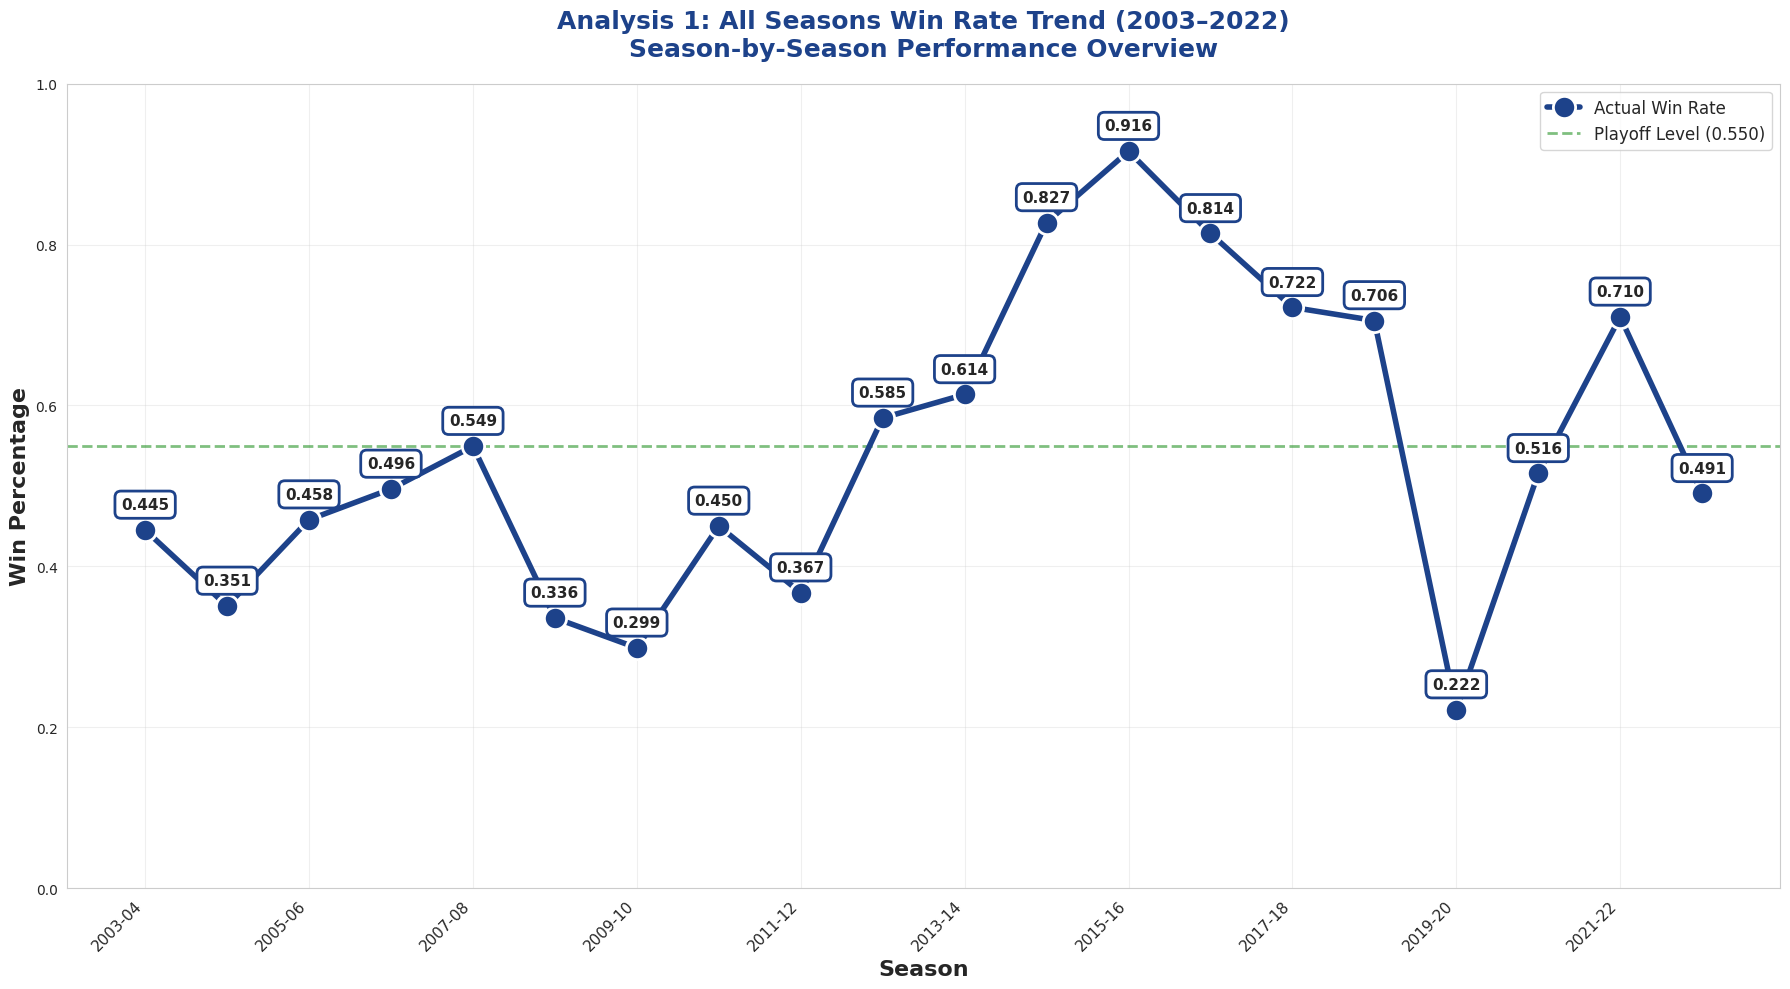


[핵심 수치]
  • 평균 승률: 0.544
  • 최고 승률: 2015-16 - 0.916
  • 최저 승률: 2019-20 - 0.222
  • 변동성(표준편차): 0.191
  • 플레이오프 진출 시즌: 8/20시즌
  • 첫 시즌: 2003-04 - 0.445
  • 최근 시즌: 2022-23 - 0.491


In [51]:
# 분석 1: 시즌별 승률 추이 (2003-2022)

# 데이터 준비
recent_all = gsw_season.copy().reset_index(drop=True)

# 1-1. 분석 데이터 기초 통계 확인
print("\n" + "="*80)
print("분석 1: 시즌별 승률 추이")
print("="*80)

print("\n[시즌별 승률 기초 통계]")
print(recent_all['W_PCT'].describe())

print("\n[승률 분포]")
print(f"• 최고 승률 시즌: {recent_all.loc[recent_all['W_PCT'].idxmax(), 'SEASON_LABEL']}"
      f" ({recent_all['W_PCT'].max():.3f})")
print(f"• 최저 승률 시즌: {recent_all.loc[recent_all['W_PCT'].idxmin(), 'SEASON_LABEL']}"
      f" ({recent_all['W_PCT'].min():.3f})")

# 그래프 생성
fig, ax = plt.subplots(figsize=(18, 10))

# 승률 추이 선 그래프
ax.plot(
    range(len(recent_all)),
    recent_all['W_PCT'].values,
    'o-',
    linewidth=4,
    markersize=16,
    color=GSW_BLUE,
    label='Actual Win Rate',
    markeredgewidth=2,
    markeredgecolor='white',
    zorder=3
)

# 각 시즌 승률 수치 표시
for i, val in enumerate(recent_all['W_PCT'].values):
    ax.annotate(
        f'{val:.3f}',
        xy=(i, val),
        xytext=(0, 15),
        textcoords='offset points',
        ha='center',
        fontsize=11,
        fontweight='bold',
        bbox=dict(
            boxstyle='round,pad=0.4',
            facecolor='white',
            edgecolor=GSW_BLUE,
            linewidth=2
        )
    )

# 플레이오프 기준선 (승률 0.550)
ax.axhline(
    0.550,
    color='green',
    linestyle='--',
    linewidth=2,
    alpha=0.5,
    label='Playoff Level (0.550)'
)

# 축 라벨 및 제목
ax.set_xlabel('Season', fontsize=16, fontweight='bold')
ax.set_ylabel('Win Percentage', fontsize=16, fontweight='bold')
ax.set_title(
    'Analysis 1: All Seasons Win Rate Trend (2003–2022)\n'
    'Season-by-Season Performance Overview',
    fontsize=18,
    fontweight='bold',
    pad=20,
    color=GSW_BLUE
)

# X축 시즌 라벨 (일부만 표시하여 가독성 확보)
step = max(1, len(recent_all) // 10)
ax.set_xticks(range(0, len(recent_all), step))
ax.set_xticklabels(
    [recent_all['SEASON_LABEL'].iloc[i] for i in range(0, len(recent_all), step)],
    rotation=45,
    ha='right',
    fontsize=11
)

# 기타 설정
ax.legend(loc='best', fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

# 저장 및 출력
plt.tight_layout()
save_path = "analysis_01_warriors_winrate_trend_2003_2022.final.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

# 핵심 지표 계산
volatility = recent_all['W_PCT'].std()
avg_winrate = recent_all['W_PCT'].mean()

# 12. 추가 인사이트 계산
max_season = recent_all.loc[recent_all['W_PCT'].idxmax()]
min_season = recent_all.loc[recent_all['W_PCT'].idxmin()]
playoff_seasons = len(recent_all[recent_all['W_PCT'] >= 0.550])

# 결과 요약
print("\n[핵심 수치]")
print(f"  • 평균 승률: {avg_winrate:.3f}")
print(f"  • 최고 승률: {max_season['SEASON_LABEL']} - {max_season['W_PCT']:.3f}")
print(f"  • 최저 승률: {min_season['SEASON_LABEL']} - {min_season['W_PCT']:.3f}")
print(f"  • 변동성(표준편차): {volatility:.3f}")
print(f"  • 플레이오프 진출 시즌: {playoff_seasons}/{len(recent_all)}시즌")
print(f"  • 첫 시즌: {recent_all.iloc[0]['SEASON_LABEL']} - {recent_all.iloc[0]['W_PCT']:.3f}")
print(f"  • 최근 시즌: {recent_all.iloc[-1]['SEASON_LABEL']} - {recent_all.iloc[-1]['W_PCT']:.3f}")

## 분석 2 : 홈 어드밴티지 및 승리 요인

**목표:** 홈 구장 수익성과 핵심 성공 요인 분석

**사용 컬럼:**
- `IS_HOME`: 홈/원정 구분자
- `GSW_WIN`: 승/패
- `GSW_AST`: 어시스트
- `GSW_REB`: 리바운드
- `GSW_FG_PCT`: 필드골 성공률
- `GSW_FG3_PCT`: 3점슛 성공률
- `GSW_FT_PCT`: 자유투 성공률

**전처리:**
- 홈/원정 경기 분리
- 홈 vs 원정 승률 계산
- 승리 요인 상관관계 분석

**시각화:**
- Part A: 홈/원정 승률 비교 파이 차트
- Part B: 상관계수를 보여주는 막대 차트

**선택 이유:** 파이 차트는 승/패 분포를 명확히 보여주고, 막대 차트는 요인의 중요도 순위를 표시

**인사이트:**
- 홈 어드밴티지 크기
- 승리를 위한 핵심 통계
- 투자 우선순위


분석 2: 홈 어드밴티지 및 승리 요인

[홈/원정 경기 분포]
홈 경기: 907경기
원정 경기: 916경기

[홈 경기 주요 스탯 평균]
• 평균 어시스트: 26.2
• 평균 리바운드: 44.2
• 평균 필드골 성공률: 0.475
• 평균 3점슛 성공률: 0.375
• 평균 자유투 성공률: 0.768

[홈 경기 승리와의 상관관계]
FG%         0.442551
FG3%        0.371897
Assists     0.370686
Rebounds    0.240359
FT%         0.147647
Name: GSW_WIN, dtype: float64


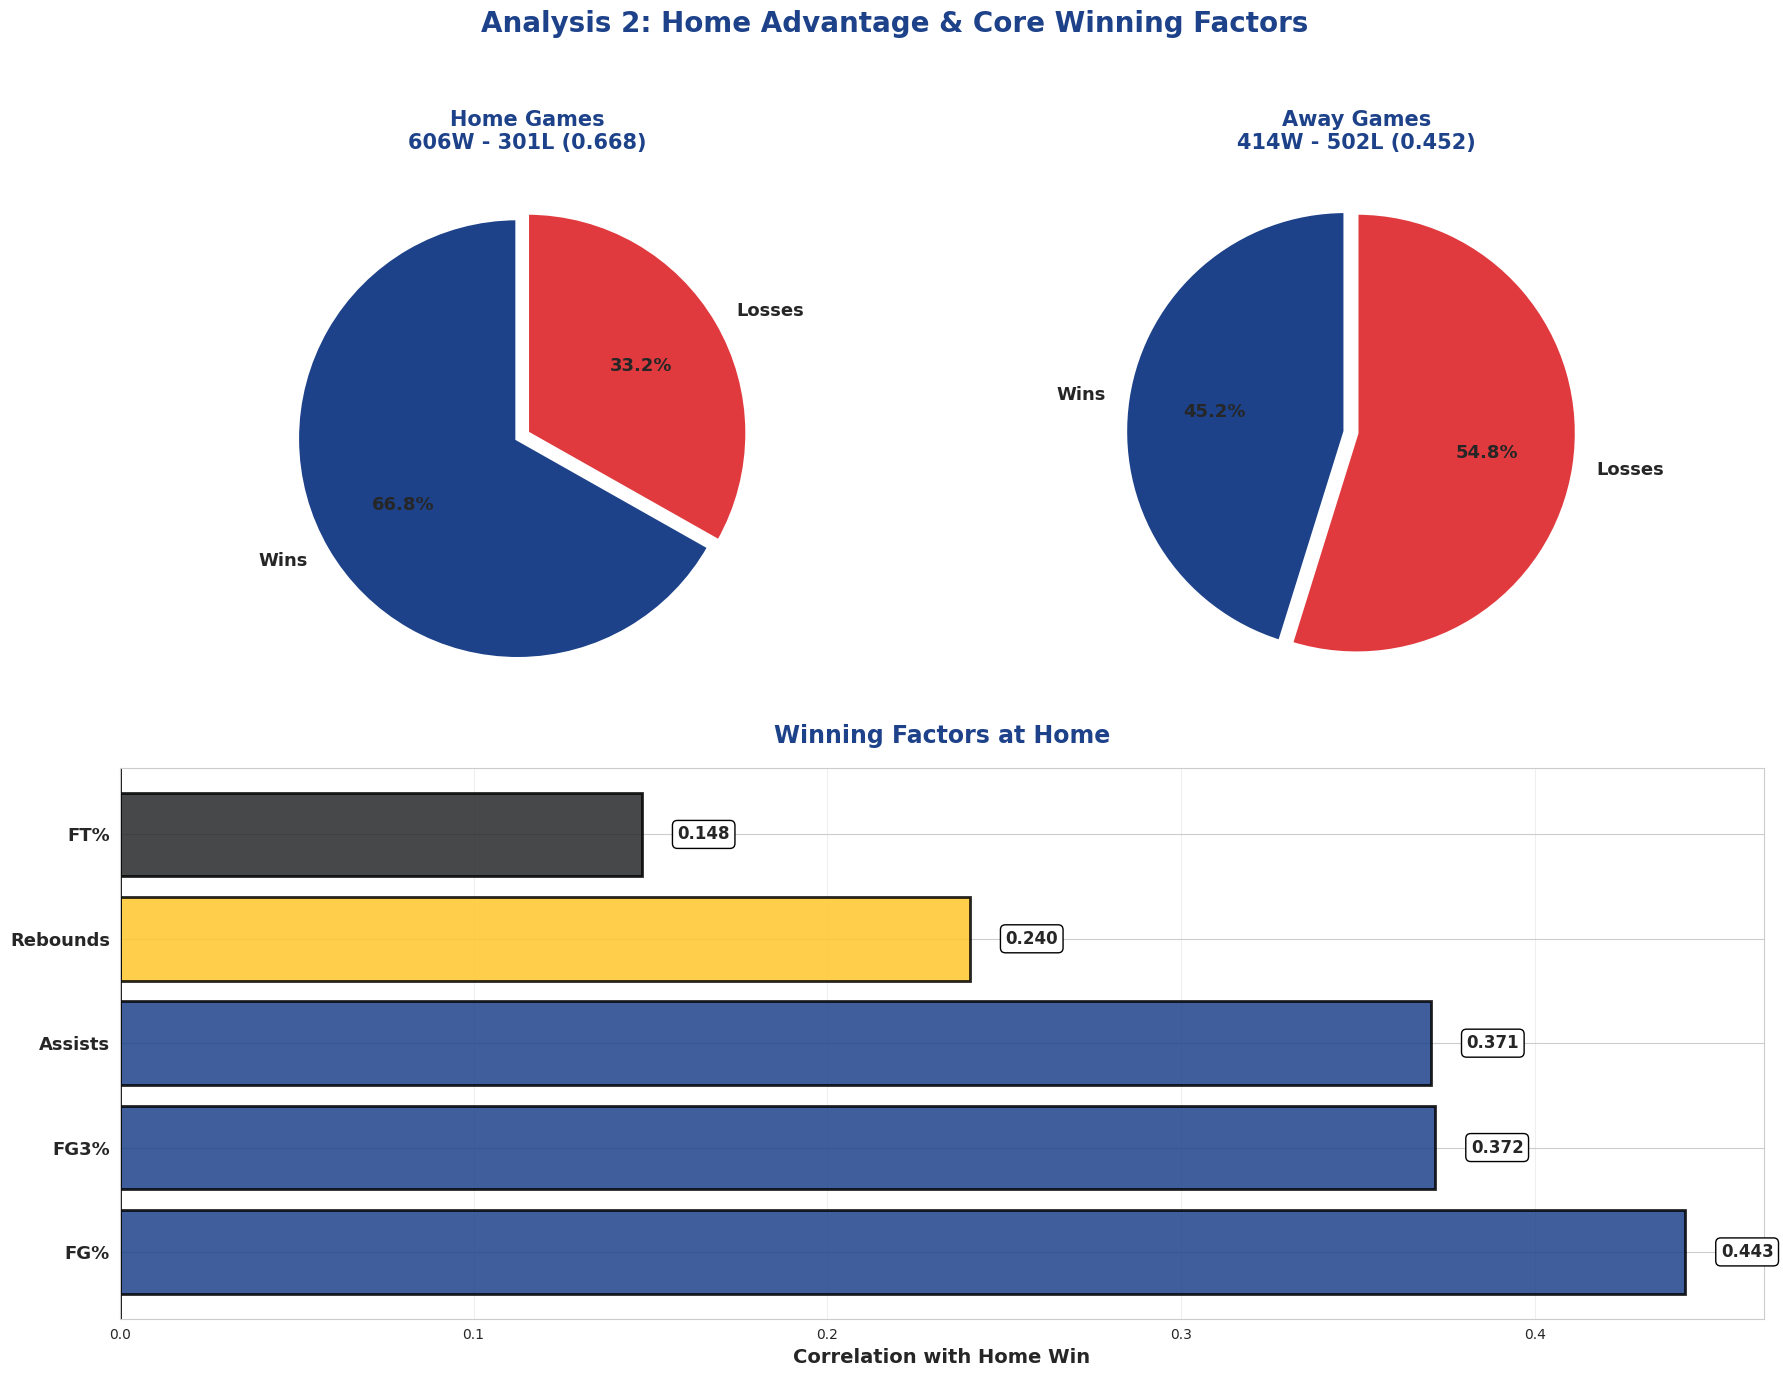


[핵심 발견]
• 홈 승률: 0.668 (606승-301패)
• 원정 승률: 0.452 (414승-502패)
• 홈 어드밴티지: +0.216
• 최우선 승리 요인: FG% (상관계수: 0.443)

[승리 요인 순위]
  1. FG%: 0.443
  2. FG3%: 0.372
  3. Assists: 0.371
  4. Rebounds: 0.240
  5. FT%: 0.148


In [52]:
# 분석 2: 홈 어드밴티지 및 승리 요인

# 홈/원정 경기 분리
gsw_home = gsw_games[gsw_games['IS_HOME'] == True]
gsw_away = gsw_games[gsw_games['IS_HOME'] == False]

# 홈/원정 데이터 분포 확인
print("\n" + "="*80)
print("분석 2: 홈 어드밴티지 및 승리 요인")
print("="*80)

print("\n[홈/원정 경기 분포]")
print(f"홈 경기: {len(gsw_home)}경기")
print(f"원정 경기: {len(gsw_away)}경기")

# 홈/원정 승률 계산
home_winrate = gsw_home['GSW_WIN'].mean()
away_winrate = gsw_away['GSW_WIN'].mean()
home_advantage = home_winrate - away_winrate

# 홈/원정 승패 수 계산
home_wins = gsw_home['GSW_WIN'].sum()
home_losses = len(gsw_home) - home_wins
away_wins = gsw_away['GSW_WIN'].sum()
away_losses = len(gsw_away) - away_wins

# 홈 경기 승리 요인 상관관계 분석
stats_cols = ['GSW_AST', 'GSW_REB', 'GSW_FG_PCT', 'GSW_FG3_PCT', 'GSW_FT_PCT']
gsw_home_copy = gsw_home[['GSW_WIN'] + stats_cols].copy()
gsw_home_copy['GSW_WIN'] = gsw_home_copy['GSW_WIN'].astype(int)

correlations = gsw_home_copy.corr()['GSW_WIN'].drop('GSW_WIN')
correlations.index = ['Assists', 'Rebounds', 'FG%', 'FG3%', 'FT%']
correlations = correlations.sort_values(ascending=False)

# 홈 경기 스탯 기초 통계
print("\n[홈 경기 주요 스탯 평균]")
print(f"• 평균 어시스트: {gsw_home['GSW_AST'].mean():.1f}")
print(f"• 평균 리바운드: {gsw_home['GSW_REB'].mean():.1f}")
print(f"• 평균 필드골 성공률: {gsw_home['GSW_FG_PCT'].mean():.3f}")
print(f"• 평균 3점슛 성공률: {gsw_home['GSW_FG3_PCT'].mean():.3f}")
print(f"• 평균 자유투 성공률: {gsw_home['GSW_FT_PCT'].mean():.3f}")

# 상관관계 확인
print("\n[홈 경기 승리와의 상관관계]")
print(correlations.sort_values(ascending=False))

# 시각화 (상단 2개 파이 차트 + 하단 1개 바 차트)
fig = plt.figure(figsize=(18, 14))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

# 홈 경기 승/패 비율
ax1.pie(
    [home_wins, home_losses],
    labels=['Wins', 'Losses'],
    autopct='%1.1f%%',
    colors=[GSW_BLUE, '#E03A3E'],
    startangle=90,
    explode=(0.05, 0),
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 3}
)
ax1.set_title(
    f'Home Games\n{home_wins}W - {home_losses}L ({home_winrate:.3f})',
    fontsize=15,
    fontweight='bold',
    color=GSW_BLUE
)

# 원정 경기 승/패 비율
ax2.pie(
    [away_wins, away_losses],
    labels=['Wins', 'Losses'],
    autopct='%1.1f%%',
    colors=[GSW_BLUE, '#E03A3E'],
    startangle=90,
    explode=(0.05, 0),
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 3}
)
ax2.set_title(
    f'Away Games\n{away_wins}W - {away_losses}L ({away_winrate:.3f})',
    fontsize=15,
    fontweight='bold',
    color=GSW_BLUE
)

# 홈 경기 승리 요인 상관관계
colors_corr = [
    GSW_BLUE if v > 0.25 else GSW_YELLOW if v > 0.15 else GSW_GRAY
    for v in correlations.values
]

bars = ax3.barh(
    range(len(correlations)),
    correlations.values,
    color=colors_corr,
    alpha=0.85,
    edgecolor='black',
    linewidth=2
)

ax3.set_yticks(range(len(correlations)))
ax3.set_yticklabels(correlations.index, fontsize=13, fontweight='bold')
ax3.set_xlabel('Correlation with Home Win', fontsize=14, fontweight='bold')
ax3.set_title('Winning Factors at Home', fontsize=17, fontweight='bold', color=GSW_BLUE, pad=18)
ax3.axvline(0, color='black', linewidth=2)
ax3.grid(True, axis='x', alpha=0.3)

# 상관계수 값 표시
for i, (bar, v) in enumerate(zip(bars, correlations.values)):
    ax3.text(
        v + 0.01,
        i,
        f'{v:.3f}',
        va='center',
        ha='left',
        fontsize=12,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black')
    )

# 전체 제목 및 저장
plt.suptitle(
    'Analysis 2: Home Advantage & Core Winning Factors',
    fontsize=20,
    fontweight='bold',
    y=0.98,
    color=GSW_BLUE
)
plt.tight_layout(rect=[0, 0, 1, 0.95])

save_path = "analysis_02_home_advantage_winning_factors.final.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

# 핵심 인사이트 출력
top_factor = correlations.idxmax()
top_corr = correlations.max()

print("\n[핵심 발견]")
print(f"• 홈 승률: {home_winrate:.3f} ({home_wins}승-{home_losses}패)")
print(f"• 원정 승률: {away_winrate:.3f} ({away_wins}승-{away_losses}패)")
print(f"• 홈 어드밴티지: {home_advantage:+.3f}")
print(f"• 최우선 승리 요인: {top_factor} (상관계수: {top_corr:.3f})")

print("\n[승리 요인 순위]")
for i, (factor, corr) in enumerate(correlations.items(), 1):
    print(f"  {i}. {factor}: {corr:.3f}")